# Очистка данных

In [8]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp39-cp39-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [9]:
import pandas as pd
from pandas import read_csv
from numpy import nan
from numpy import isnan
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from sklearn.feature_selection import VarianceThreshold
from numpy import percentile
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

### Файл oil-spill.csv это совокупность некоторых признаков (на основании спутниковых изображений океана) которые должны указывать содержит этот некоторый участок розлив нефти или нет
### Отсутствие розлива 0, розлив нефти 1 (последняя колонка)

In [64]:
filename = "D:\Projects\DS_Fst_course\Prepareted_data\oil-spill.csv"
data=read_csv(filename, header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
5,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
6,7,116,1446.29,580.94,97,290000.0,41.53,6.24,3660.0,0.15,...,1060.66,403.11,164.58,114.82,6.44,0,31258.37,65.79,7.85,1
7,8,57,28.68,715.39,141,142500.0,51.67,0.83,1810.0,0.02,...,500.00,360.56,165.71,132.47,3.02,0,51985.06,65.67,6.25,0
8,9,188,964.23,456.23,22,470000.0,38.90,5.89,3720.0,0.15,...,1569.24,492.44,256.77,124.72,6.11,0,28871.82,65.67,7.36,1
9,10,64,903.02,274.88,33,160000.0,41.22,7.90,1850.0,0.19,...,471.70,223.61,182.83,50.12,2.58,0,32053.95,65.58,7.35,1


### 1. Удаление признаков с низкой вариацией значений

In [65]:
counts = data.nunique()
print(counts)

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [66]:
data.shape

(937, 50)

In [73]:
data.dropna(thresh=2, axis=1)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [75]:
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[22]


In [79]:
data.drop(to_del, axis=1, inplace=True)

In [81]:
data.shape

(937, 49)

In [82]:
df = data.values

In [88]:
data.drop(0, axis=1, inplace=True)

In [89]:
data

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
0,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,214.7,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,110.0,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,107.2,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,133.9,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,97.5,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


### Используем функцию VarianceThreshold() которая удаляет признаки с нулевой дисперсией

In [96]:
filename = "D:\Projects\DS_Fst_course\Prepareted_data\oil-spill.csv"
df=read_csv(filename, header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
5,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
6,7,116,1446.29,580.94,97,290000.0,41.53,6.24,3660.0,0.15,...,1060.66,403.11,164.58,114.82,6.44,0,31258.37,65.79,7.85,1
7,8,57,28.68,715.39,141,142500.0,51.67,0.83,1810.0,0.02,...,500.00,360.56,165.71,132.47,3.02,0,51985.06,65.67,6.25,0
8,9,188,964.23,456.23,22,470000.0,38.90,5.89,3720.0,0.15,...,1569.24,492.44,256.77,124.72,6.11,0,28871.82,65.67,7.36,1
9,10,64,903.02,274.88,33,160000.0,41.22,7.90,1850.0,0.19,...,471.70,223.61,182.83,50.12,2.58,0,32053.95,65.58,7.35,1


In [97]:
data = df.values

In [98]:
X = data[:, :-1]
y = data[:, -1]

In [100]:
X.shape

(937, 49)

In [103]:
transform = VarianceThreshold()

### Применим матрицу факторных признаков Х с помощью созданного объекта, применив метод fit_transform()

In [104]:
X_sel = transform.fit_transform(X)

In [106]:
X_sel.shape
# действительно удалился один столбец с отсутствием дисперсии

(937, 48)

## 2. Удаление дубликатов

### Работаем с датасетом iris

In [108]:
iris = "D:\Projects\DS_Fst_course\Prepareted_data\iris.csv"
df=read_csv(iris, header=None)
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Находим дубликаты в каждой строчке

In [109]:
dups = df.duplicated()

In [110]:
dups

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [111]:
# Проверяем в принципе наличие дубликатов используя метод any()
print(dups.any())

True


In [112]:
# Выводим сточки с дубликатами с помощью маски
print(df[dups])

       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [113]:
df.shape

(150, 5)

In [114]:
# Удаляем дубликаты
df.drop_duplicates(inplace=True)

In [115]:
df.shape

(147, 5)

## 3. Выявление и удаление выбросов

In [119]:
# Задаем счетчик случайных чисел
seed(1)

In [123]:
# создаем 10000 нормально распределенных чисел со средним 50 и стандартным отклонением 5.
data = 5 * randn(10000) + 50

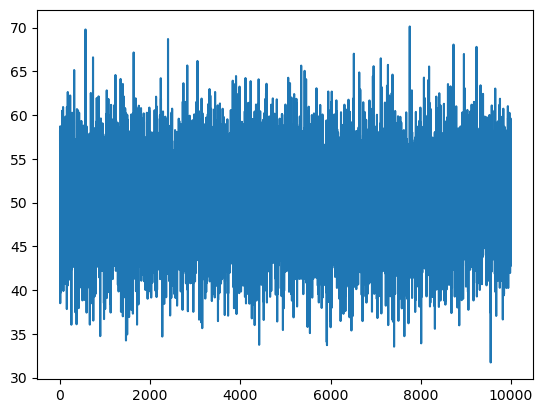

In [134]:
plt.plot(data)
plt.show()

In [143]:
# Вычисление среднего и стандартного отклонения
data_mean, data_std = np.mean(data), np.std(data)

In [144]:
# Найдем 3 стандартных отклонения,что будет составлять  99.7 процентов данных
cut_off = data_std * 3

In [145]:
# Найдем верхнюю и нижнюю границы интервалов 99.7 процентов данных
lower, upper = data_mean - cut_off, data_mean + cut_off

In [146]:
# В переменную outliers запишем данные которые выходят за границу
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 29


In [147]:
 # В переменную outliers_removed запишем данные которые внутри границы
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9971


### Если распределение данных существенно отличается от нормального, то выбросы корректней определять, как 1.5 межквартильных размаха от первого и третьего квартилей

In [151]:
### В переменные q25, q75 запишем значения первого и третьего квартилей, воспользовавшись функцией percentile() из модуля numpy.
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)

In [153]:
### Находим межквартильных размах
iqr = q75 - q25

In [154]:
### В переменную cut_off запишем величину, равную 1.5 межквартильных размаха.
cut_off = iqr * 1.5

In [155]:
### Найдем нижнюю (lower) и верхнюю (upper) границу интервала, охватывающего данные без выбросов.
lower, upper = q25 - cut_off, q75 + cut_off

In [156]:
### В переменную outliers запишем данные, которые выходят за указанные границы, т.е. являются выбросами.
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 81


In [158]:
### В переменную outliers_removed запишем данные, которые не выходят за указанные границы, т.е. не являются выбросами.
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 9919


### Используем функцию LocalOutlierFactor(), которая использует принцип метода ближайших соседей для выявления выбросов как наиболее удаленных от основного набора данных наблюдений. Используем датасет housing

In [7]:
filename = 'D:\Projects\DS_Fst_course\Prepareted_data\housing.csv'
df=pd.read_csv(filename, header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [8]:
data = df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(506, 13) (506,)


### Разобьем выборку на обучающую и тестовую с помощью функции train_test_split(X, Y, test_size=test_size, random_state= random_state) из модуля sklearn.model_selection. Результат запишем в переменные X_train, X_test, Y_train, Y_test. запишем в переменную test_size долю отложенной (тестовой) выборки. Пусть она составляет 0,33. Зададим в переменной random_state ядро случайных чисел для воспроизводимости результатов. Пусть random_state = 1.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [16]:
# Создадим модель линейной регрессии с помощью функции LinearRegression() из модуля sklearn.linear_model. Результат запишем в переменную model.
model = LinearRegression()

In [17]:
# Обучим ее на обучающей выборке с помощью функции fit().
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Найдем прогнозные значения по модели на тестовом наборе, воспользовавшись методом predict(). Результат запишем в переменную yhat.
yhat = model.predict(X_test)

In [20]:
# Рассчитаем среднюю абсолютную ошибку на тестовом наборе, воспользовавшись функцией mean_absolute_error(y_test, yhat) из модуля sklearn.metrics. 
# Результат запишем в переменную mae и выведем на экран.
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


In [22]:
# Создадим объект lof для удаления выбросов, воспользовавшись функцией LocalOutlierFactor() из модуля sklearn.neighbors.
lof = LocalOutlierFactor()

In [23]:
yhat = lof.fit_predict(X_train)

In [24]:
# Функция LocalOutlierFactor() размечает данные, как нормальные (1) и выбросы (-1). Создадим маску mask, которая включает в себя нормальные данные.
mask = yhat != -1

In [25]:
# На основе маски выберем строки, которые не являются выбросами. Перезапишем переменные X_train, y_train.
X_train, y_train = X_train[mask, :], y_train[mask]

In [27]:
print(X_train.shape, y_train.shape)
# Количество данных уменьшилось

(305, 13) (305,)


In [28]:
# Обучим модель линейной регрессии на обучающей выборке, очищенной от выбросов, с помощью функции fit().
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Найдем прогнозные значения по модели на тестовом наборе, воспользовавшись методом predict(). Результат запишите в переменную yhat.
yhat = model.predict(X_test)

In [34]:
# Рассчитаnm среднюю абсолютную ошибку на тестовом наборе, воспользовавшись функцией mean_absolute_error(y_test, yhat) из модуля sklearn.metrics.
# Результат запишем в переменную mae и выведем на экран. 
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.356


## Раздел 4. Выявление и удаление строк с пропусками

In [36]:
# Загрузим данные файла pima-indians-diabetes.csv с помощью функции read_csv() из модуля pandas. 
# Результат запишем в переменную dataset. Посмотрим на первые 5 наблюдений с помощью метода head().
link = "D:\Projects\DS_Fst_course\Prepareted_data\pima-indians-diabetes.csv"
dataset = pd.read_csv(link, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# Выведем описательные статистики
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

В следующих столбцах минимальное значение равно 0, чего быть не может:

1: Plasma glucose concentration 

2: Diastolic blood pressure

3: Triceps skinfold thickness

4: 2-Hour serum insulin

5: Body mass index

Видимо в 0 зашифрованы пропуски


In [39]:
# Посчитаем количество пропущенных значений в столбцах 1,2,3,4,5.
# Результат запишите в переменную num_missing и выведите на экран.
# count the number of missing values for each column
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()

# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [44]:
# Заменим нули на nan значения в столбцах 1,2,3,4,5, воспользовавшись методом replace().
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.nan)

In [45]:
# Посчитаем количество пропущенных значений в столбцах 1,2,3,4,5, воспользовавшись функциями isnull() и sum().
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [46]:
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

In [47]:
print(dataset.shape)

(768, 9)


In [48]:
dataset.dropna(inplace=True)

In [49]:
print(dataset.shape)

(392, 9)


## 5. Заполнение пропусков на основе статистик

In [72]:
link = "D:\Projects\DS_Fst_course\Prepareted_data\horse-colic.csv"
dataframe = pd.read_csv(link, header=None, na_values= '?')
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [73]:
data = dataframe.values

In [74]:
# Разделим набор данных на факторные признаки X (все, кроме столбца №23) и результативный признак y (столбец №23).
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [78]:
# Выведем на экран количество пропущенных значений у факторных признаков, воспользовавшись функцией sum(), 
# функцией isnan() из модуля numpy и методом flatten().
print('Missing: %d' % sum(pd.isna(X).flatten()))

Missing: 1605


In [77]:
X[0]

array([2.00000e+00, 1.00000e+00, 5.30101e+05, 3.85000e+01, 6.60000e+01,
       2.80000e+01, 3.00000e+00, 3.00000e+00,         nan, 2.00000e+00,
       5.00000e+00, 4.00000e+00, 4.00000e+00,         nan,         nan,
               nan, 3.00000e+00, 5.00000e+00, 4.50000e+01, 8.40000e+00,
               nan,         nan, 2.00000e+00, 1.13000e+04, 0.00000e+00,
       0.00000e+00, 2.00000e+00])

In [81]:
# Создадим объект imputer, который заменяет пропущенные значения признаков их средними, 
# воспользовавшись функцией SimpleImputer(strategy='mean') из модуля sklearn.impute.
imputer = SimpleImputer(strategy='mean')

In [82]:
# Обучим его на факторных признаках с помощью метода fit().
imputer.fit(X)

SimpleImputer()

In [83]:
# Преобразуем факторные признаки с помощью метода transform() созданного объекта imputer. 
# Результат запишем в переменную Xtrans.
Xtrans = imputer.transform(X)

In [85]:
Xtrans[0]

array([2.00000000e+00, 1.00000000e+00, 5.30101000e+05, 3.85000000e+01,
       6.60000000e+01, 2.80000000e+01, 3.00000000e+00, 3.00000000e+00,
       2.85375494e+00, 2.00000000e+00, 5.00000000e+00, 4.00000000e+00,
       4.00000000e+00, 1.75510204e+00, 1.58247423e+00, 4.70754717e+00,
       3.00000000e+00, 5.00000000e+00, 4.50000000e+01, 8.40000000e+00,
       2.03703704e+00, 3.01960784e+00, 2.00000000e+00, 1.13000000e+04,
       0.00000000e+00, 0.00000000e+00, 2.00000000e+00])

In [87]:
# Выведем на экран количество пропущенных значений у преобразованных факторных признаков, воспользовавшись функцией sum(), 
# функцией isnan() из модуля numpy и методом flatten().
print('Missing: %d' % sum(pd.isna(Xtrans).flatten()))

Missing: 0


In [90]:
# Создадим модель случайного леса с помощью функции RandomForestClassifier() из модуля sklearn.ensemble.
# Результат запишем в переменную model.
model = RandomForestClassifier()

In [93]:
# Создадим конвеер, в котором последовательно для разных фолдов сначала происходит замена пропущенных значений на среднее,
# а затем строится модель случайного леса. Воспользуйтесь при этом функцией 
# Pipeline(steps=[('i', imputer), ('m', model)]) из модуля sklearn.pipeline.
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [95]:
# Создадим объект разбиения на фолды с помощью функции RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# из модуля sklearn.model_selection. Результат запишем в переменную cv.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [97]:
# Проведем кросс-валидацию, воспользовавшись функцией cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# из модуля sklearn.model_selection. Запишем результат в переменную scores.
# Параметр n_jobs=-1 означает, что нужно осуществлять параллельно обучение модели и расчет метрики качества, 
# задействовав все процессоры.
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [99]:
# Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, 
# воспользовавшись, соответственно, функциями mean() и std().
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.866 (0.051)


In [100]:
# Обучим модель pipeline на всех данных с помощью метода fit().
pipeline.fit(X, y)

Pipeline(steps=[('i', SimpleImputer()), ('m', RandomForestClassifier())])

In [101]:
# Зададим произвольную новую строчку данных, содержащую пропущенные значения.
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

In [102]:
# Найдем прогнозное значение для новых данных по модели, воспользовавшись ее методом predict().
yhat = pipeline.predict([row])

In [103]:
# Выведем на экран прогнозное значение класса результативного признака.
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


## Раздел 6. Заполнение пропусков методом kNN

## Загрузим данные файла horse-colic.csv с помощью функции read_csv() из модуля pandas. Результат запишем в переменную dataframe. Посмотрим на первые 5 наблюдений с помощью метода head().

In [10]:
dataframe = read_csv("D:\Projects\DS_Fst_course\Prepareted_data\horse-colic.csv", header=None, na_values='?')
print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


### Сохраняем значения признаков

In [11]:
data = dataframe.values

In [12]:
# Разделим набор данных на факторные признаки X (все, кроме столбца №23)
# и результативный признак y (столбец №23).
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [13]:
# Выводим на экран количество пропущенных значений
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


### Создадим объект imputer, который заменяет пропущенные значения признаков методом kNN, воспользовавшись функцией KNNImputer() из модуля sklearn.impute

In [15]:
imputer = KNNImputer()

In [16]:
# Обучим его на факторных признаках с помощью метода fit().
imputer.fit(X)

KNNImputer()

### Преобразуем факторные признаки с помощью метода transform() созданного объекта imputer. Результат запишием в переменную Xtrans.

In [19]:
Xtrans = imputer.transform(X)

In [20]:
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


### Создадим модель случайного леса с помощью функции RandomForestClassifier() из модуля sklearn.ensemble. Результат запишите в переменную model.

In [21]:
model = RandomForestClassifier()

### Создадим конвеер, в котором последовательно для разных фолдов сначала происходит замена пропущенных значений на среднее, а затем строится модель случайного леса. Воспользуемся при этом функцией Pipeline(steps=[('i', imputer), ('m', model)]) из модуля sklearn.pipeline.

In [22]:
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

### Создадим объект разбиения на фолды с помощью функции RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) из модуля sklearn.model_selection. Результат запишите в переменную cv.

In [23]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Проведем кросс-валидацию, воспользовавшись функцией cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) из модуля sklearn.model_selection. Запишем результат в переменную scores.

In [24]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### Выведем на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std().

In [25]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.864 (0.056)


### Обучим модель pipeline на всех данных с помощью метода fit().

In [29]:
pipeline.fit(X, y)

Pipeline(steps=[('i', KNNImputer()), ('m', RandomForestClassifier())])

### Зададим произвольную новую строчку данных, содержащую пропущенные значения.

In [30]:
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

In [31]:
# Найдем прогнозное значение для новых данных по модели, воспользовавшись ее методом predict().

In [32]:
yhat = pipeline.predict([row])

### Выведите на экран прогнозное значение класса результативного признака.

In [33]:
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


# Раздел 7. Заполнение пропусков итеративным методом

### Загрузим данные файла horse-colic.csv с помощью функции read_csv() из модуля pandas. Результат запишем в переменную dataframe. Посмотрите на первые 5 наблюдений с помощью метода head().

In [23]:
dataframe = read_csv("D:\Projects\DS_Fst_course\Prepareted_data\horse-colic.csv", header=None, na_values='?')
print(dataframe.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [24]:
data = dataframe.values

In [25]:
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

In [26]:
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 1605


In [27]:
imputer = IterativeImputer()

In [28]:
imputer.fit(X)

IterativeImputer()

In [29]:
Xtrans = imputer.transform(X)

In [30]:
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


In [31]:
model = RandomForestClassifier()

In [32]:
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

In [33]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [34]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [35]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.872 (0.049)


In [36]:
pipeline.fit(X, y)

Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])

In [37]:
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

In [38]:
yhat = pipeline.predict([row])

In [39]:
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2
